## Employee Attrition 




In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("emp.csv")
df.shape

(1470, 35)

In [3]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [134]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [137]:
attrition_count = pd.DataFrame(df['Attrition'].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


<AxesSubplot:xlabel='Attrition', ylabel='count'>

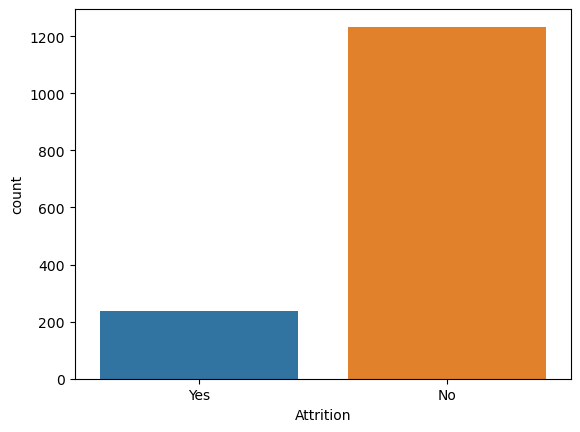

In [138]:
sns.countplot(data=df, x='Attrition')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

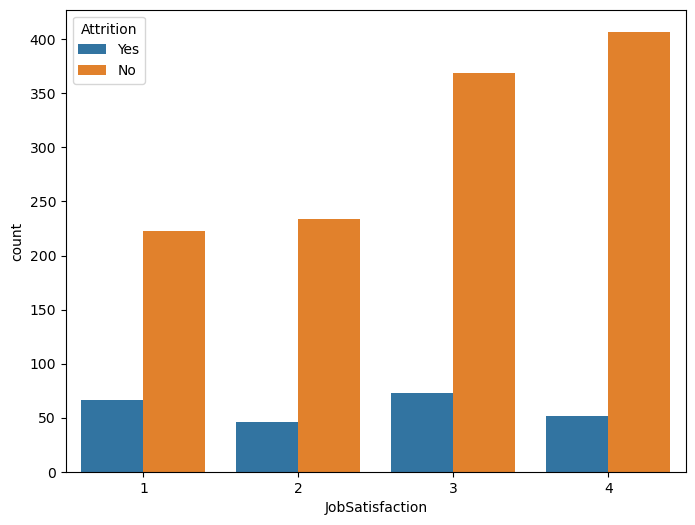

In [139]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)

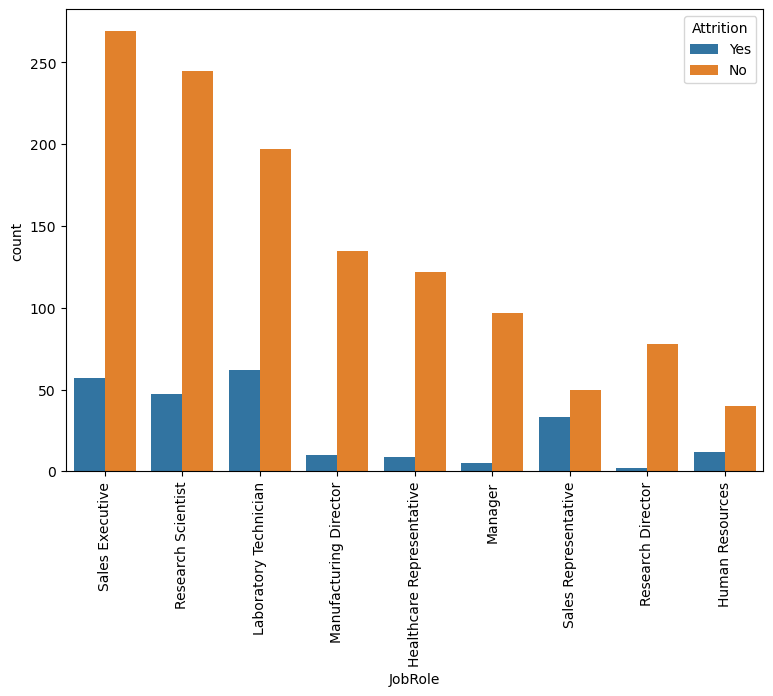

In [140]:
plt.figure(figsize=(9,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=90)
plt.show()

In [141]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [142]:
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [143]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [144]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['Attrition'] = l.fit_transform(df.Attrition)


In [145]:
temp = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
df['BusinessTravel'] = df.BusinessTravel.map(temp)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [146]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [147]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [148]:
for col in df.columns:
    if df[col].dtype == 'object':
        l = LabelEncoder()
        df[col] = l.fit_transform(df[col])
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int64
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [149]:
df.corr()['Attrition'].sort_values(ascending=True)

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

In [150]:
df = df.drop(['EmployeeCount','Over18','StandardHours','OverTime','MaritalStatus','BusinessTravel',
              'TotalWorkingYears','JobLevel','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager',
              'StockOptionLevel','YearsAtCompany','JobInvolvement'],axis=1)

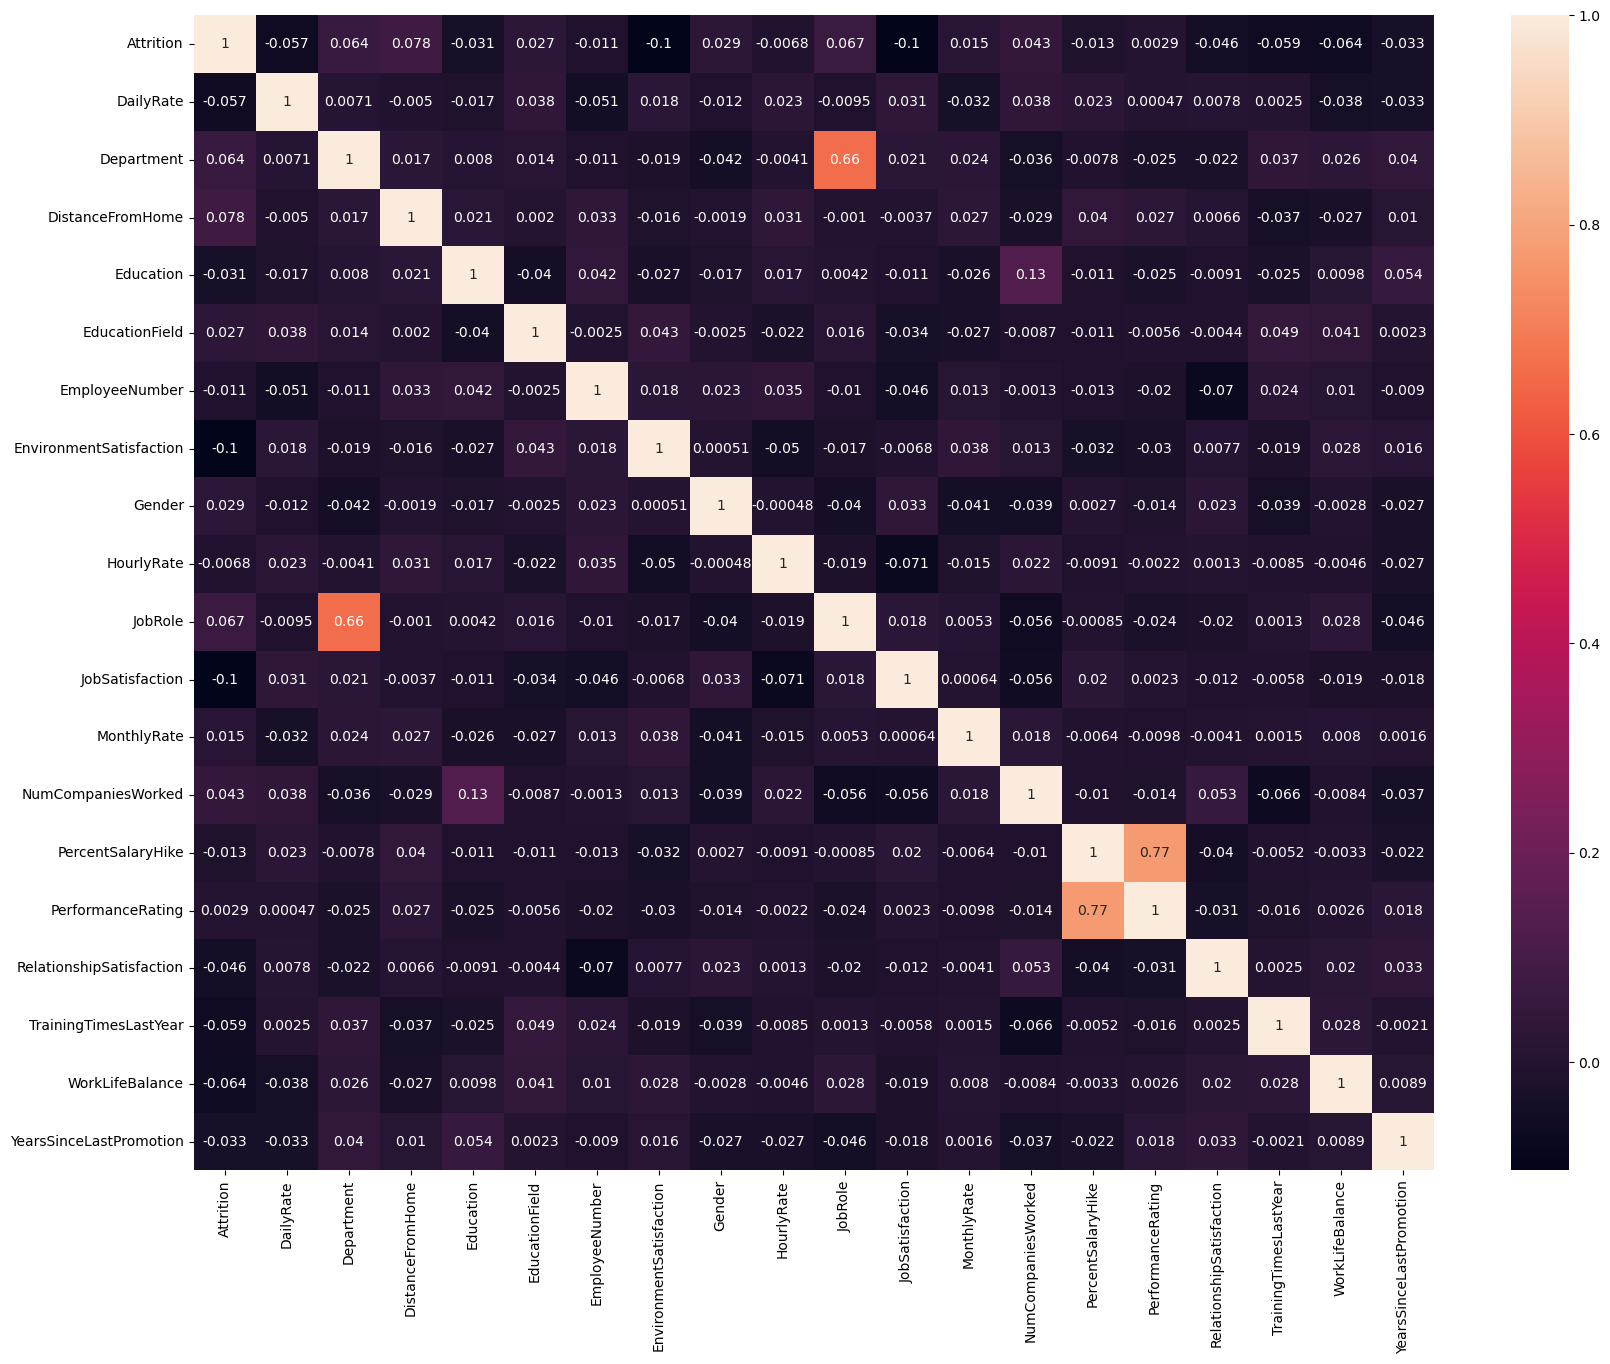

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [161]:
df.head()

,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,1,1102,2,1,2,1,1,2,0,7,4,8,11,3,1,0,1,0
1,0,279,1,8,1,1,2,3,1,6,2,1,23,4,4,3,3,1
2,1,1373,1,2,2,4,4,4,1,2,3,6,15,3,2,3,3,0
3,0,1392,1,3,4,1,5,4,0,6,3,1,11,3,3,3,3,3
4,0,591,1,2,1,3,7,1,1,2,2,9,12,3,4,3,3,2


In [153]:
df=df.drop(['MonthlyRate','HourlyRate'], axis=1)

In [154]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

In [155]:
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size=0.2) 

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(Xtrain,ytrain)
rf.score(Xtest,ytest)

0.8537414965986394

In [157]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(Xtrain,ytrain)
sv.score(Xtest,ytest)

0.8571428571428571

In [158]:
from sklearn.metrics import confusion_matrix
ypred = sv.predict(Xtrain)
confusion_matrix(ytrain,ypred)

array([[981,   0],
       [195,   0]], dtype=int64)

In [83]:
train_data = df[:1176]
train_data.head()

,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,1,1102,2,1,2,1,1,2,0,7,4,8,11,3,1,0,1,0
1,0,279,1,8,1,1,2,3,1,6,2,1,23,4,4,3,3,1
2,1,1373,1,2,2,4,4,4,1,2,3,6,15,3,2,3,3,0
3,0,1392,1,3,4,1,5,4,0,6,3,1,11,3,3,3,3,3
4,0,591,1,2,1,3,7,1,1,2,2,9,12,3,4,3,3,2


In [162]:
majo = train_data[train_data.Attrition == 0]
mino = train_data[train_data.Attrition == 1]

majo.shape,mino.shape

((982, 18), (194, 18))

In [163]:
from sklearn.utils import resample
min_upsampled = resample(mino, replace=True, n_samples = 982, random_state=42)

In [164]:
min_upsampled.tail()

,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
706,1,1479,2,24,3,1,986,2,0,7,2,4,16,3,4,2,2,0
528,1,562,2,8,2,5,723,2,1,7,3,3,14,3,1,4,3,1
259,1,307,1,29,2,3,355,3,1,2,2,0,11,3,2,2,4,1
1007,1,337,1,14,1,4,1421,3,0,0,4,0,12,3,1,1,3,7
660,1,781,1,2,1,1,918,4,1,2,4,9,14,3,4,3,2,0


In [165]:
df_upsampled = pd.concat([majo,min_upsampled])

In [166]:
df_upsampled.Attrition.value_counts()

0    982
1    982
Name: Attrition, dtype: int64

In [167]:
df_upsampled.shape


(1964, 18)

In [168]:
Xtrain_up = df_upsampled.drop(['Attrition'], axis=1)
ytrain_up = df_upsampled['Attrition']
Xtrain_up.shape, ytrain_up.shape

((1964, 17), (1964,))

In [169]:
rf.fit(Xtrain_up, ytrain_up)
rf.score(Xtest,ytest)

0.9693877551020408

In [170]:
ypred = rf.predict(Xtest)
confusion_matrix(ytest,ypred)

array([[252,   0],
       [  9,  33]], dtype=int64)

In [171]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(ytest, ypred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98       252
     class 1       1.00      0.79      0.88        42

    accuracy                           0.97       294
   macro avg       0.98      0.89      0.93       294
weighted avg       0.97      0.97      0.97       294

